In [1]:
import pandas as pd
import numpy as np


In [2]:
data_file = "penguins.csv"

In [15]:
penguins = pd.read_csv(data_file)
penguins.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [4]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit


In [37]:
species_vc = penguins.species.value_counts(normalize=True)
island_vc = penguins.island.value_counts(normalize=True)
sex_vc = penguins.sex.value_counts(normalize=True)

print(species_vc)
print(island_vc)
print(sex_vc)


species
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: proportion, dtype: float64
island
Biscoe       0.488372
Dream        0.360465
Torgersen    0.151163
Name: proportion, dtype: float64
sex
MALE      0.502994
FEMALE    0.494012
.         0.002994
Name: proportion, dtype: float64


Add a column based where the species ( target attribute) is ordinal encoded, use it for stratified split

In [38]:
#not used
spec_indices = list(penguins.species.unique())
spec_indices

['Adelie', 'Chinstrap', 'Gentoo']

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
# ! The result should be a Dataframe her , not a Series
penguins_spec = penguins[["species"]]

In [41]:
penguins_spec

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
339,Gentoo
340,Gentoo
341,Gentoo
342,Gentoo


In [42]:
ordinal_encoder = OrdinalEncoder()
penguins_spec_encoded = ordinal_encoder.fit_transform(penguins_spec)
penguins_spec_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [43]:
penguins['spec_ord'] = penguins_spec_encoded

In [44]:
penguins

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,spec_ord
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0.0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0.0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2.0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,2.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,2.0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,2.0


In [45]:
penguins.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'spec_ord'],
      dtype='object')

In [46]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
 7   spec_ord           344 non-null    float64
dtypes: float64(5), object(3)
memory usage: 21.6+ KB


In [47]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(penguins, penguins["spec_ord"]):
    strat_train_set = penguins.loc[train_index]
    strat_test_set = penguins.loc[test_index]

Check the proportions of the test set

In [48]:
strat_test_set.spec_ord.value_counts() / len(strat_test_set)

spec_ord
0.0    0.442308
2.0    0.355769
1.0    0.201923
Name: count, dtype: float64

Compare to the proportions of the whole dataset

In [49]:
penguins["spec_ord"].value_counts()  / len(penguins)

spec_ord
0.0    0.441860
2.0    0.360465
1.0    0.197674
Name: count, dtype: float64

create train and test set

In [50]:
train_set, test_set = train_test_split(penguins, test_size=0.3, random_state=42)

create random train and test sets

In [52]:
def random_split(data, test_ratio):
    shuffled_indexes = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indexes[:test_set_size]
    train_indices = shuffled_indexes[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

random_train_set, random_test_set = random_split(penguins, 0.3)

Compare proportions

In [61]:
def data_proportions(data):
    return data["spec_ord"].value_counts()/ len(data)

compare_props = pd.DataFrame({"Overall": data_proportions(penguins),
                              "Standard" : data_proportions(test_set),
                                "Stratified": data_proportions(strat_test_set),
                                "Random": data_proportions(random_test_set)}).sort_index()


compare_props["Std. %error"] = 100 * compare_props["Standard"] / compare_props["Overall"] - 100
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props


,Overall,Standard,Stratified,Random,Std. %error,Rand. %error,Strat. %error
spec_ord,,,,,,,
0.0,0.441860,0.480769,0.442308,0.359223,8.805668,-18.702095,0.101215
1.0,0.197674,0.192308,0.201923,0.203883,-2.714932,3.141062,2.149321
2.0,0.360465,0.326923,0.355769,0.436893,-9.305211,21.202631,-1.302730


Do an additional split for the validation set

In [62]:
# in the final solution we can call this without Strat prefix
strat_test_set, strat_validation_set = train_test_split(strat_test_set, test_size=0.5, random_state=42)

drop category columns

In [63]:
for set_ in (strat_train_set, strat_test_set, strat_validation_set):
    set_.drop("spec_ord", axis=1, inplace=True)

Visualize species

In [66]:
from matplotlib import pyplot as plt

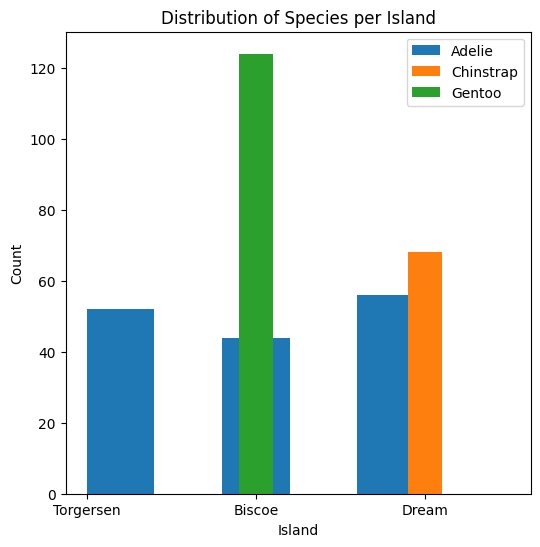

In [73]:
fig, ax = plt.subplots(figsize=(6,6))

unique_species = penguins["species"].unique()

for species in unique_species: 
    data = penguins[penguins["species"]== species]
    ax.hist(data["island"], bins=5, label=species)

ax.set_xlabel("Island")
ax.set_ylabel("Count")
ax.set_title("Distribution of Species per Island")
ax.legend()

plt.show()

Prepare data - drop target column

In [64]:
penguins_train = strat_train_set.drop("species", axis=1)
penguins_labels = penguins["species"].copy()
penguins_labels

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object